<a href="https://colab.research.google.com/github/vaishnavi-eklaspur/EDS-ASSIGNMENT/blob/main/267_ESE_PRACTICAL_SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIND COUNT OF MALE PASSENGERS WHO SURVIVED

In [23]:
import pandas as pd

# Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/Titanic (1).csv')

# Filter the DataFrame to include only male passengers who survived
male_passengers_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

# Count the number of male passengers who survived
count_male_passengers_survived = len(male_passengers_survived)

# Print the count
print("Count of male passengers who survived:", count_male_passengers_survived)


Count of male passengers who survived: 109


FIND COUNT OF MALE PASSENGERS WHO PREFERRED "THIRD CLASS" TICKET

In [24]:


# Filter the DataFrame to include only male passengers who preferred "Third Class" tickets
male_third_class_passengers = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]

# Count the number of male passengers who preferred "Third Class" tickets
count_male_third_class_passengers = len(male_third_class_passengers)

# Print the count
print("Count of male passengers who preferred Third Class tickets:", count_male_third_class_passengers)


Count of male passengers who preferred Third Class tickets: 347


FIND COUNT OF PASSENGERS GENDER WISE AND CLASS WISE

In [25]:


# Count the passengers by gender
passenger_count_gender = df['Sex'].value_counts()

# Count the passengers by class
passenger_count_class = df['Pclass'].value_counts()

# Print the counts by gender
print("Passenger count by gender:")
print(passenger_count_gender)

# Print the counts by class
print("\nPassenger count by class:")
print(passenger_count_class)


Passenger count by gender:
male      577
female    314
Name: Sex, dtype: int64

Passenger count by class:
3    491
1    216
2    184
Name: Pclass, dtype: int64


FIND COUNT OF SURVIVED AND NON SURVIVED PASSENGERS

In [26]:


# Count the survived and non-survived passengers
passenger_count_survived = df['Survived'].value_counts()

# Print the counts
print("Non-survived(0) and survived passenger(1) count:")
print(passenger_count_survived)


Non-survived(0) and survived passenger(1) count:
0    549
1    342
Name: Survived, dtype: int64


PLOT THE DENSITY ON AGE AND GIVE YOUR CONCLUSION

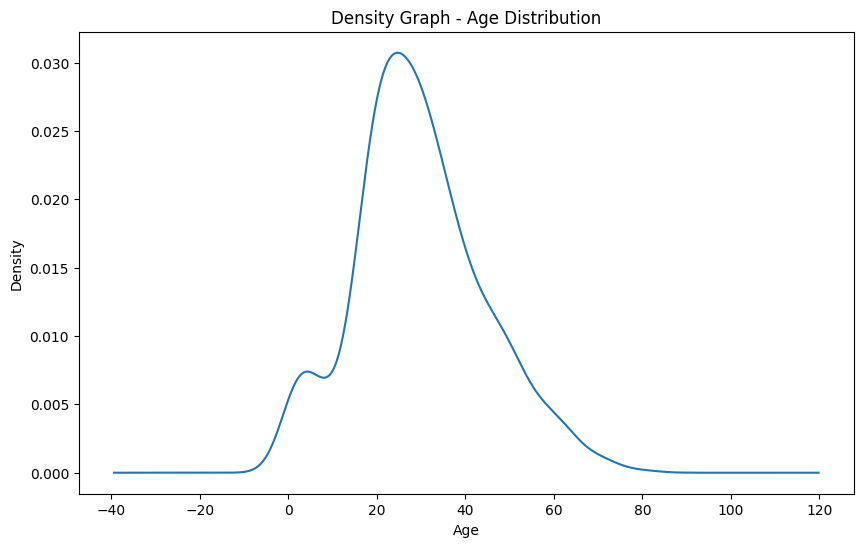

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out missing age values
df = df.dropna(subset=['Age'])

# Plot density graph for age
plt.figure(figsize=(10, 6))
plt.title("Density Graph - Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
df['Age'].plot(kind='density')
plt.show()


CONCLUSION ABOUT THE GRAPH:
The first peak of the density curve suggests a significant number of passengers were in the age range of approximately 20 to 30 years.
The second peak indicates another group of passengers in the age range of approximately 60 to 70 years.
There is a relatively lower density of passengers in the age range of 30 to 60 years.
The graph shows a gradual decrease in density as the age increases beyond 70 years, indicating fewer passengers in older age groups.

PLOT SUBPLOT FOR GENDER VS PCLASS

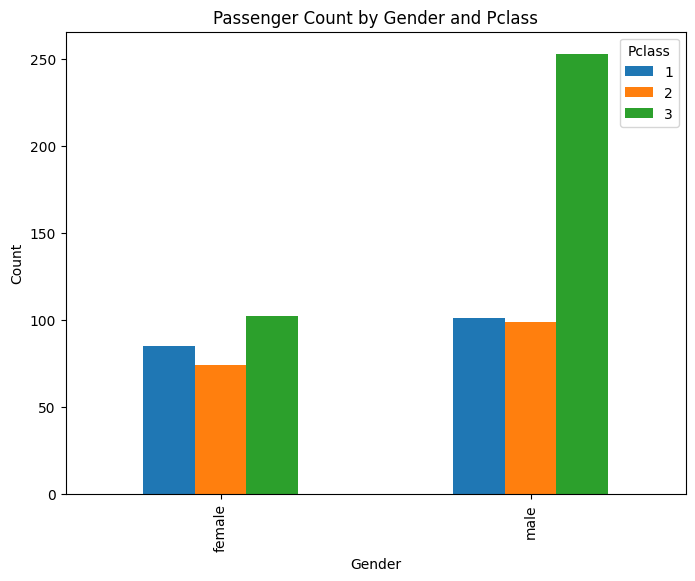

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the passengers by Gender and Pclass
gender_pclass_count = df.groupby(['Sex', 'Pclass']).size().unstack()

# Plot the subplot
fig, ax = plt.subplots(figsize=(8, 6))
gender_pclass_count.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Passenger Count by Gender and Pclass')

# Show the plot
plt.show()


APPLY K-MEANS ON AGE AND PCLASS

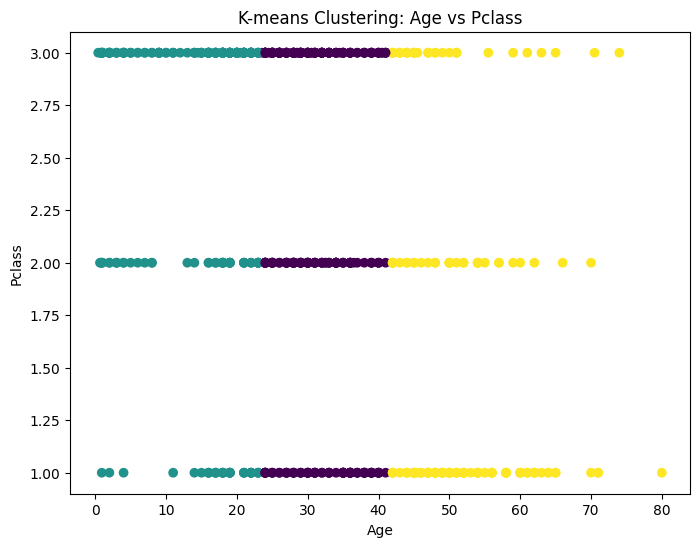

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Extract the 'Age' and 'Pclass' columns
X = df[['Age', 'Pclass']].copy()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

# Assign clusters to the data points
df.loc[:, 'Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Pclass'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.title('K-means Clustering: Age vs Pclass')
plt.show()
